In [1]:
# importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

# Load the datasets
customers = pd.read_csv(r"C:\Users\ziniy\Downloads\Customers.csv")
products = pd.read_csv(r"C:\Users\ziniy\Downloads\Products.csv")
transactions = pd.read_csv(r"C:\Users\ziniy\Downloads\Transactions.csv")

# Inspect datasets
print(customers.info())
print(products.info())
print(transactions.info())

# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Merge datasets for a comprehensive view
data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

In [3]:
# EDA: Top customers by total spend
top_customers = data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
print("Top Customers by Revenue:\n", top_customers)

# EDA: Revenue by region
region_revenue = data.groupby('Region')['TotalValue'].sum()
print("Revenue by Region:\n", region_revenue)

# EDA: Top-selling products
top_products = data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top-Selling Products:\n", top_products)

# EDA: Revenue trends over time
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
revenue_trend = data.groupby(data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()


Top Customers by Revenue:
 CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64
Revenue by Region:
 Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64
Top-Selling Products:
 ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64


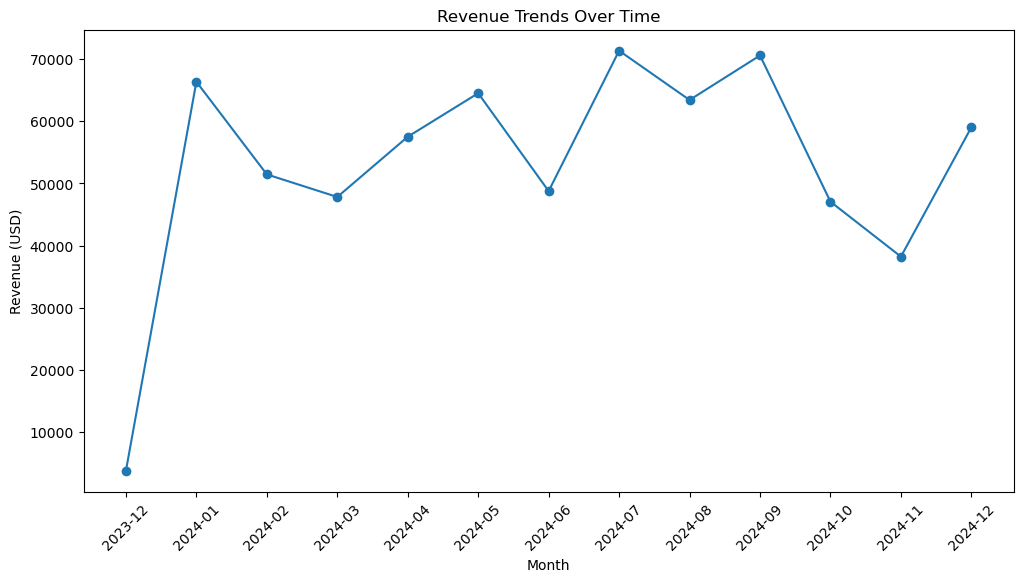

In [4]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(revenue_trend.index.astype(str), revenue_trend.values, marker='o')
plt.title('Revenue Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Revenue (USD)')
plt.xticks(rotation=45)
plt.show()
